In [1]:
# Necessary imports

import numpy as np
import pandas as pd

from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

import statsmodels.api as sm
from statsmodels.tsa.api import Holt

import prepare

import warnings
warnings.filterwarnings("ignore")

# Plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [2]:
# Acquire the data

df = pd.read_csv('GlobalLandTemperaturesByState.csv')
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [3]:
# Check the shape

df.shape

(645675, 5)

In [4]:
# Make sure the dates are in datetime format

df.rename(columns = {'dt':'Date'}, inplace = True)

In [5]:
# Make date the index

df = df.set_index('Date').sort_index()

In [6]:
# Make sure the dates are in datetime format

df.index = pd.to_datetime(df.index)

In [7]:
df.head()

,AverageTemperature,AverageTemperatureUncertainty,State,Country
Date,,,,
1743-11-01,1.909,2.033,Nova Scotia,Canada
1743-11-01,0.753,2.817,Michigan,United States
1743-11-01,0.665,2.208,Prince Edward Island,Canada
1743-11-01,-0.526,2.304,Pskov,Russia
1743-11-01,1.891,1.718,Massachusetts,United States


In [8]:
df.index

DatetimeIndex(['1743-11-01', '1743-11-01', '1743-11-01', '1743-11-01',
               '1743-11-01', '1743-11-01', '1743-11-01', '1743-11-01',
               '1743-11-01', '1743-11-01',
               ...
               '2013-09-01', '2013-09-01', '2013-09-01', '2013-09-01',
               '2013-09-01', '2013-09-01', '2013-09-01', '2013-09-01',
               '2013-09-01', '2013-09-01'],
              dtype='datetime64[ns]', name='Date', length=645675, freq=None)

In [9]:
# Add a column for year

df['Year'] = df.index.year
df.head()

,AverageTemperature,AverageTemperatureUncertainty,State,Country,Year
Date,,,,,
1743-11-01,1.909,2.033,Nova Scotia,Canada,1743
1743-11-01,0.753,2.817,Michigan,United States,1743
1743-11-01,0.665,2.208,Prince Edward Island,Canada,1743
1743-11-01,-0.526,2.304,Pskov,Russia,1743
1743-11-01,1.891,1.718,Massachusetts,United States,1743


In [10]:
# Filter for Texas

tx_df = df[df['State'].str.contains("Texas")]
tx_df

,AverageTemperature,AverageTemperatureUncertainty,State,Country,Year
Date,,,,,
1820-01-01,4.489,3.369,Texas,United States,1820
1820-02-01,9.081,2.873,Texas,United States,1820
1820-03-01,12.657,2.423,Texas,United States,1820
1820-04-01,19.215,2.501,Texas,United States,1820
1820-05-01,22.577,2.495,Texas,United States,1820
...,...,...,...,...,...
2013-05-01,22.628,0.158,Texas,United States,2013
2013-06-01,27.841,0.220,Texas,United States,2013
2013-07-01,27.630,0.182,Texas,United States,2013


In [11]:
# Check for nulls

tx_df.isnull().sum()

AverageTemperature               0
AverageTemperatureUncertainty    0
State                            0
Country                          0
Year                             0
dtype: int64

In [12]:
# Describe the data

tx_df.describe().T

,count,mean,std,min,25%,50%,75%,max
AverageTemperature,2325.0,18.107234,7.413791,1.965,11.206,18.378,25.398,31.401
AverageTemperatureUncertainty,2325.0,0.794785,0.893291,0.044,0.180,0.310,1.241,4.950
Year,2325.0,1916.375484,55.942931,1820.000,1868.000,1916.000,1965.000,2013.000


In [13]:
# Converting the AvgTemp from celcius to fahrenheit

tx_df['AverageTemperature'] = (tx_df['AverageTemperature']*9/5)+32

In [14]:
# Check the converted data

tx_df

,AverageTemperature,AverageTemperatureUncertainty,State,Country,Year
Date,,,,,
1820-01-01,40.0802,3.369,Texas,United States,1820
1820-02-01,48.3458,2.873,Texas,United States,1820
1820-03-01,54.7826,2.423,Texas,United States,1820
1820-04-01,66.5870,2.501,Texas,United States,1820
1820-05-01,72.6386,2.495,Texas,United States,1820
...,...,...,...,...,...
2013-05-01,72.7304,0.158,Texas,United States,2013
2013-06-01,82.1138,0.220,Texas,United States,2013
2013-07-01,81.7340,0.182,Texas,United States,2013


In [15]:
tx_df = tx_df.drop(['State', 'Country'], axis=1)

### Takeaways
- much smaller dataset after filtering for only Texas
- no nulls
- converted temps from celcius to fahrenheit
- added Year column
- dropped State and Country columns

## Split the data

In [16]:
# Set train size to be 50% of total 

train_size = int(len(tx_df) * .5)
train_size

1162

In [17]:
# Set validate size to be 30% of total 

validate_size = int(len(tx_df) * .3)
validate_size

697

In [18]:
# Set test size to be number of rows remaining

test_size = int(len(tx_df) - train_size - validate_size)
test_size

466

In [19]:
# Validate will go from 1162 to 1858
validate_end_index = train_size + validate_size
validate_end_index

1859

In [20]:
# train will go from 0 to 1161
train = tx_df[: train_size]
# validate will go from 1162 to 1858
validate = tx_df[train_size:validate_end_index]
# test will include 1859 to the end
test = tx_df[validate_end_index:]

In [21]:
# Check out the split

train.shape, validate.shape, test.shape

((1162, 3), (697, 3), (466, 3))

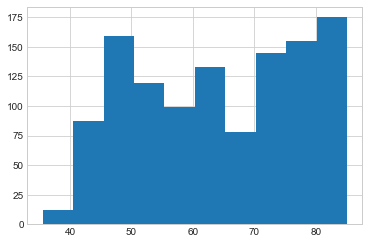

In [22]:
# Histogram of average temp

train.AverageTemperature.hist()

In [23]:
# Set target as y - in this case using historic temperature to predict future temperature

y = train.AverageTemperature
y.head()

Date
1820-01-01    40.0802
1820-02-01    48.3458
1820-03-01    54.7826
1820-04-01    66.5870
1820-05-01    72.6386
Name: AverageTemperature, dtype: float64

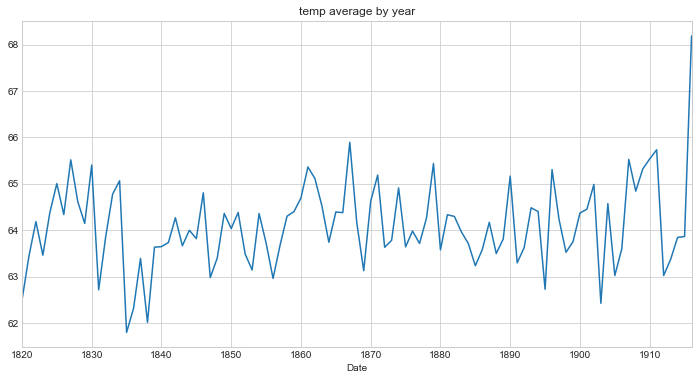

In [24]:
# Visualize temp average by year

plt.figure(figsize=(12,6))
y.resample('Y').mean().plot(title='temp average by year')

<Figure size 864x432 with 0 Axes>

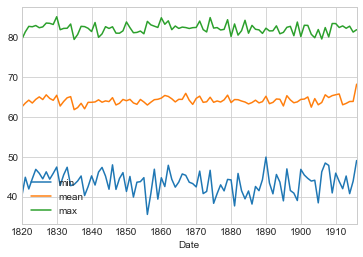

In [25]:
# Visualize monthly min, mean, max sales

plt.figure(figsize=(12,6))
y.resample('Y').agg(['min', 'mean', 'max']).plot()

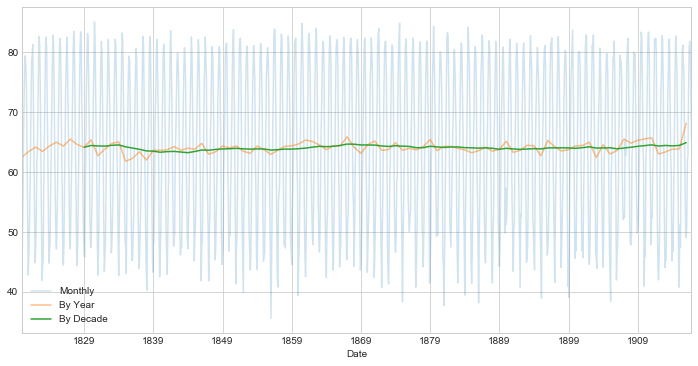

In [26]:
# Plot the rolling avg

plt.figure(figsize=(12,6))
y.plot(alpha=.2, label='Monthly')
y.resample('Y').mean().rolling(1).mean().plot(alpha=.5, label='By Year')
y.resample('Y').mean().rolling(10).mean().plot(alpha=8, label='By Decade')
plt.legend()

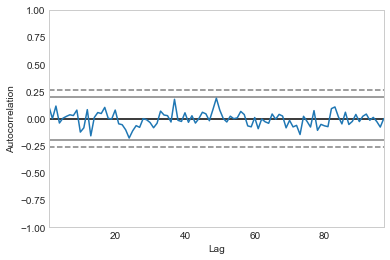

In [27]:
# Autocorrelation plot indicating largely white noise

pd.plotting.autocorrelation_plot(train.AverageTemperature.resample('Y').mean())

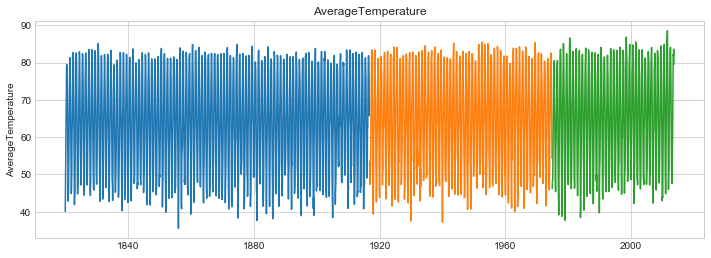

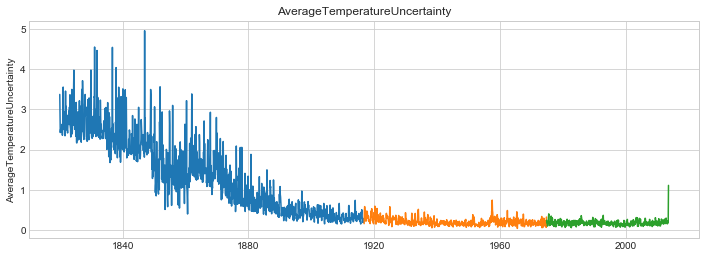

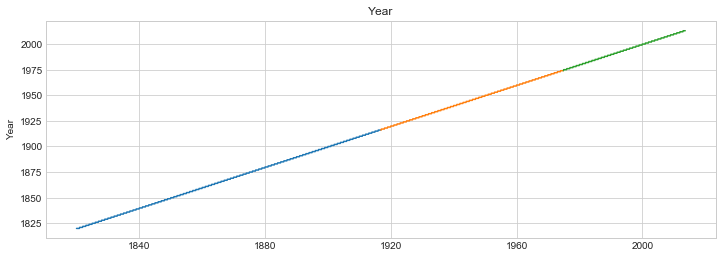

In [28]:
# Visualize train, validate and test

for col in train.columns:
    plt.figure(figsize=(12,4))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

## Model

In [29]:
# Maggie's function will compute the Mean Squared Error and the Rood Mean Squared Error to evaluate

def evaluate(target_var):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

In [30]:
# Uses the evaluate function and will also plot train and test values with the predicted values in order to compare performance

def plot_and_eval(target_var):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label='Train', linewidth=1)
    plt.plot(validate[target_var], label='Validate', linewidth=1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.4f}'.format(rmse))
    plt.show()

In [31]:
# Create an empty dataframe

eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
eval_df

,model_type,target_var,rmse


In [32]:
# Function to store the rmse to compare

def append_eval_df(model_type, target_var):
    '''
    this function takes in as arguments the type of model run, and the name of the target variable. 
    It returns the eval_df with the rmse appended to it for that model and target_var. 
    '''
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var],
        'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

### Last Observed Value

In [33]:
# Take the last item of dollars sold and assign to variable

avg_temp = (train['AverageTemperature'][-1:][0])
avg_temp

65.741

In [34]:
# Create the yhat datatframe

yhat_df = pd.DataFrame({'AverageTemperature': [avg_temp]}, 
                      index = validate.index)

yhat_df.head()

,AverageTemperature
Date,
1916-11-01,65.741
1916-12-01,65.741
1917-01-01,65.741
1917-02-01,65.741
1917-03-01,65.741


AverageTemperature -- RMSE: 13.0000


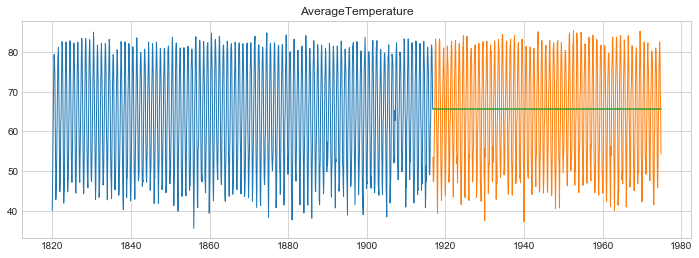

In [35]:
# Plot the results

plot_and_eval('AverageTemperature')

In [36]:
# Amends results to the eval_df

eval_df = append_eval_df(model_type = 'last_observed_value', 
                             target_var = 'AverageTemperature')

eval_df

,model_type,target_var,rmse
0,last_observed_value,AverageTemperature,13.0


### Simple Average

In [37]:
# Compute simple average

avg_temp = round(train['AverageTemperature'].mean(), 2)
avg_temp

64.09

In [38]:
def make_predictions():
    yhat_df = pd.DataFrame({'AverageTemperature': [avg_temp]},
                           index = validate.index)
    return yhat_df

In [39]:
yhat_df = make_predictions()

In [40]:
yhat_df.head()

,AverageTemperature
Date,
1916-11-01,64.09
1916-12-01,64.09
1917-01-01,64.09
1917-02-01,64.09
1917-03-01,64.09


AverageTemperature -- RMSE: 13.0000


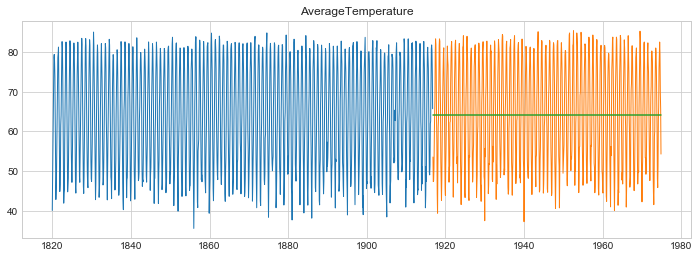

In [41]:
# Plot the results

plot_and_eval('AverageTemperature')

In [42]:
# Amends results to the eval_df

eval_df = append_eval_df(model_type='simple_average', 
                            target_var = 'AverageTemperature')
eval_df

,model_type,target_var,rmse
0,last_observed_value,AverageTemperature,13.0
1,simple_average,AverageTemperature,13.0


### Moving Average

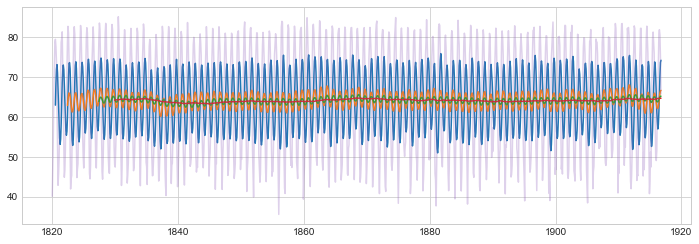

In [43]:
# Plot several moving averages

plt.figure(figsize=(12,4))
plt.plot(train['AverageTemperature'].rolling(7).mean())
plt.plot(train['AverageTemperature'].rolling(30).mean())
plt.plot(train['AverageTemperature'].rolling(90).mean())
plt.plot(train['AverageTemperature'].rolling(120).mean())
plt.plot(train['AverageTemperature'], alpha=.3)

In [44]:
# Take 30 month rolling average, then take the last element and that will be the one that propogates 
# forward as our prediction.

avg_temp = round(train['AverageTemperature'].rolling(30).mean()[-1], 2)

print(avg_temp)

66.62


In [45]:
yhat_df = make_predictions()
yhat_df.head()

,AverageTemperature
Date,
1916-11-01,66.62
1916-12-01,66.62
1917-01-01,66.62
1917-02-01,66.62
1917-03-01,66.62


AverageTemperature -- RMSE: 24.0000


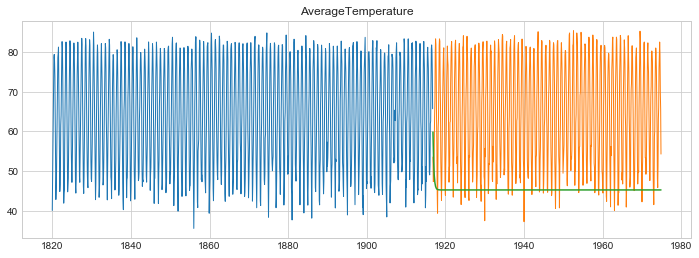

In [56]:
# Plot the results

plot_and_eval('AverageTemperature')

In [57]:
# Amends results to the eval_df

eval_df = append_eval_df(model_type = '30m_moving_avg', 
                            target_var = 'AverageTemperature')

eval_df

,model_type,target_var,rmse
0,last_observed_value,AverageTemperature,13.0
1,simple_average,AverageTemperature,13.0
2,30d_moving_avg,AverageTemperature,13.0
3,26d_moving_avg,AverageTemperature,13.0
4,52d_moving_avg,AverageTemperature,13.0
5,104d_moving_avg,AverageTemperature,13.0
6,holts_optimized,AverageTemperature,24.0
7,30m_moving_avg,AverageTemperature,24.0


In [48]:
periods = [26, 52, 104]

for p in periods: 
    avg_temp = round(train['AverageTemperature'].rolling(p).mean()[-1], 2)
    yhat_df = make_predictions()
    model_type = str(p) + 'm_moving_avg'
    eval_df = append_eval_df(model_type = model_type, 
                target_var = 'AverageTemperature')

In [49]:
# Amends results to the eval_df

eval_df

,model_type,target_var,rmse
0,last_observed_value,AverageTemperature,13.0
1,simple_average,AverageTemperature,13.0
2,30d_moving_avg,AverageTemperature,13.0
3,26d_moving_avg,AverageTemperature,13.0
4,52d_moving_avg,AverageTemperature,13.0
5,104d_moving_avg,AverageTemperature,13.0


### Holt's Linear Trend

AverageTemperature 



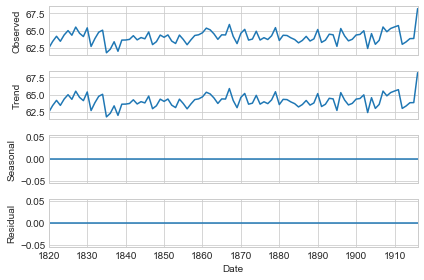

In [50]:
# Plot the reults

print('AverageTemperature', '\n')
sm.tsa.seasonal_decompose(train['AverageTemperature'].resample('Y').mean()).plot()
plt.show()

In [51]:
# Create the Holt model

model = Holt(train['AverageTemperature'], exponential=False, damped=True)
model = model.fit(optimized=True)
yhat_items = model.predict(start = validate.index[0],
                               end = validate.index[-1])
yhat_df['AverageTemperature'] = round(yhat_items, 2)

In [52]:
yhat_df

,AverageTemperature
Date,
1916-11-01,59.86
1916-12-01,55.56
1917-01-01,52.53
1917-02-01,50.39
1917-03-01,48.87
...,...
1974-07-01,45.25
1974-08-01,45.25
1974-09-01,45.25


AverageTemperature -- RMSE: 24.0000


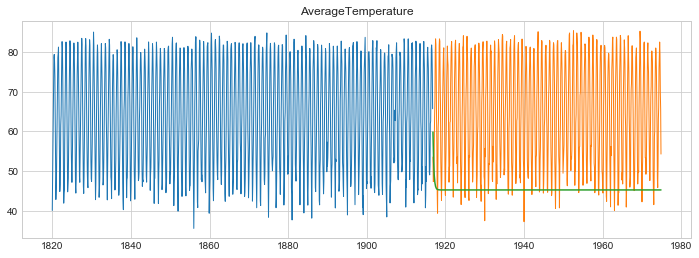

In [53]:
# Plot the results

plot_and_eval(target_var = 'AverageTemperature')

In [54]:
# Amends results to the eval_df

eval_df = append_eval_df(model_type = 'holts_optimized', 
                            target_var = 'AverageTemperature')

In [55]:
# Sort by rmse performance

eval_df.sort_values(by='rmse')

,model_type,target_var,rmse
0,last_observed_value,AverageTemperature,13.0
1,simple_average,AverageTemperature,13.0
2,30d_moving_avg,AverageTemperature,13.0
3,26d_moving_avg,AverageTemperature,13.0
4,52d_moving_avg,AverageTemperature,13.0
5,104d_moving_avg,AverageTemperature,13.0
6,holts_optimized,AverageTemperature,24.0


### Takeaways
- All of my models, except one, performed exactly the same, indicating a problem with the my logic
- The one model that performed differently, Holt's, performed worse than the rest